# 读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import savgol_filter
from sklearn import metrics
%matplotlib inline

# RMSE 均方根误差
def rmse(y, yhat):
    return np.sqrt(metrics.mean_squared_error(y, yhat))

serScada=pd.read_csv('./data/serScada.csv', index_col=0)
# 字符转标准时间索引
serScada.index = pd.to_datetime(serScada.index)
serScada

,num,wind speed(m/s),wind direction,theoretical power(kW),active power(kW)
2018-01-01 00:00:00,1,5.311336,259.994904,416.328908,380.047791
2018-01-01 00:10:00,2,5.672167,268.641113,519.917511,453.769196
2018-01-01 00:20:00,3,5.216037,272.564789,390.900016,306.376587
2018-01-01 00:30:00,4,5.659674,271.258087,516.127569,419.645905
2018-01-01 00:40:00,5,5.577941,265.674286,491.702972,380.650696
...,...,...,...,...,...
2018-12-31 23:10:00,52556,11.404030,80.502724,3397.190793,2963.980957
2018-12-31 23:20:00,52557,7.332648,84.062599,1173.055771,1684.353027
2018-12-31 23:30:00,52558,8.435358,84.742500,1788.284755,2201.106934
2018-12-31 23:40:00,52559,9.421366,84.297913,2418.382503,2515.694092


# 显示

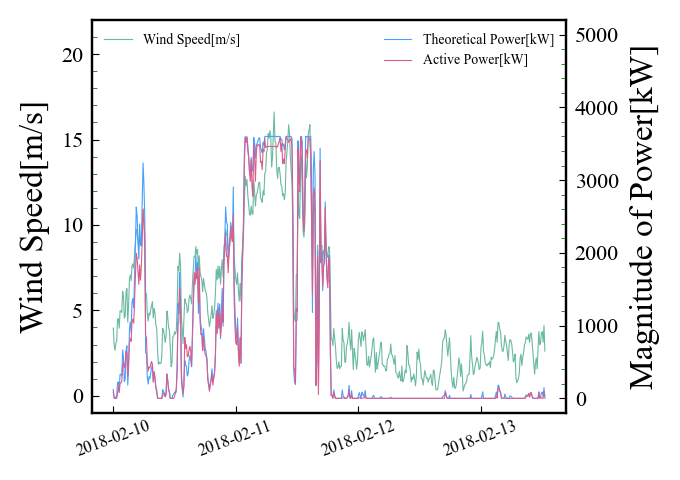

In [14]:
ser = serScada
s=144*40
e=s+1008-500
x=ser.index[s:e]  # x = ser.index

plot1=ser.iloc[s:e,[1]]
plot2=ser.iloc[s:e,[3]]
plot3=ser.iloc[s:e,[4]]
# 将配置重置为默认值
plt.rcdefaults()
# plt.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['mathtext.fontset'] = 'stix'
#     plt.rcParams('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#     plt.rcParams['font.sans-serif'] = ['mathcal']  # 设置中文编码'Microsoft YaHei''Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示
color = ['#6ABAA3', '#47A0FF', '#DC5D8A']#FD702C#837EFF
# 大小像素
fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=200)

# first part
ax1.plot(x, plot1, label='Wind Speed[m/s]', color=color[0], alpha=1, linewidth=0.4)  # 输入数据绘制第 1 个 y 轴折线图、设置折线颜色
plt.ylim((-1, 22))
# second part
ax2 = ax1.twinx()
ax2.plot(x, plot2, label='Theoretical Power[kW]', color=color[1], alpha=1, linewidth=0.4)  # 输入数据绘制第 2 个 y 轴折线图、设置折线颜色
ax2.plot(x, plot3, label='Active Power[kW]', color=color[2], alpha=1, linewidth=0.4)
plt.ylim((-200, 5200))

#设置主刻度标签的位置
ax1.yaxis.set_major_locator(plt.MultipleLocator(5)) #将y轴主刻度标签设置为 的倍数
ax2.yaxis.set_major_locator(plt.MultipleLocator(1000))
#设置次刻度标签的位置
ax1.yaxis.set_minor_locator(plt.MultipleLocator(1)) #将此y轴次刻度标签设置为 的倍数
ax2.yaxis.set_minor_locator(plt.MultipleLocator(200))

# 横轴设置
plt.xticks(x)
ax1.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=20)  # x 轴刻度值大小
# ax1.set_xlabel('sample point', fontsize=14)  # 设置 x 轴标签、字体大小
# 显示间隔数量
x_major_locator = plt.MultipleLocator(1)  # MultipleLocator()函数设置了x轴相邻显示点的间隔
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
# 纵轴设置
ax1.set_ylabel('Wind Speed[m/s]', fontsize=12)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax2.set_ylabel('Magnitude of Power[kW]', fontsize=12)  # 设置第 2 个 y 轴特征标签字体颜色、大小
ax1.tick_params(axis='y', direction='in', pad=3, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax1.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
ax2.tick_params(axis='y', direction='in', pad=3, labelsize=8, length=2.4, width=0.4)  # 第 2 个 y 轴刻度值字体颜色、大小, labelcolor=color
ax2.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 图例 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
ax1.legend(loc='upper left', frameon=False, fontsize=5)
ax2.legend(loc='upper right', frameon=False, fontsize=5)

# save and show
fig.tight_layout()
# plt.savefig('temp/windSpeedAndPower10min.png', dpi=600)
plt.show()
plt.close(fig)

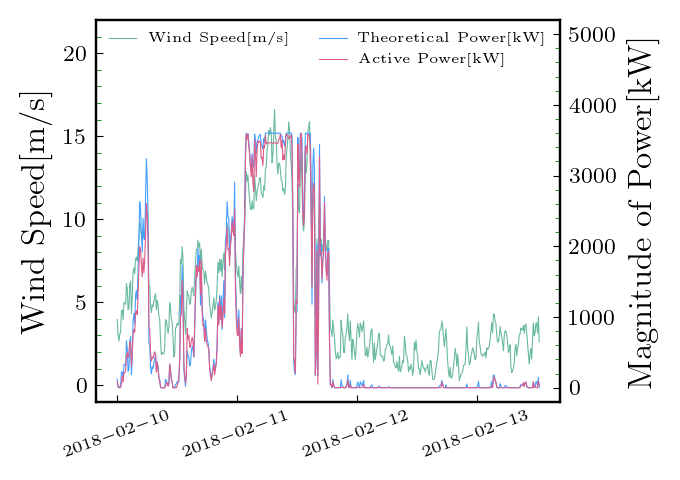

In [5]:
ser = serScada
s=144*40
e=s+1008-500
x=ser.index[s:e]  # x = ser.index

plot1=ser.iloc[s:e,[1]]
plot2=ser.iloc[s:e,[3]]
plot3=ser.iloc[s:e,[4]]
# 将配置重置为默认值
plt.rcdefaults()
plt.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
#     plt.rcParams('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#     plt.rcParams['font.sans-serif'] = ['mathcal']  # 设置中文编码'Microsoft YaHei''Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示
color = ['#6ABAA3', '#47A0FF', '#DC5D8A']#FD702C#837EFF
# 大小像素
fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=200)

# first part
ax1.plot(x, plot1, label='Wind Speed[m/s]', color=color[0], alpha=1, linewidth=0.4)  # 输入数据绘制第 1 个 y 轴折线图、设置折线颜色
plt.ylim((-1, 22))
# second part
ax2 = ax1.twinx()
ax2.plot(x, plot2, label='Theoretical Power[kW]', color=color[1], alpha=1, linewidth=0.4)  # 输入数据绘制第 2 个 y 轴折线图、设置折线颜色
ax2.plot(x, plot3, label='Active Power[kW]', color=color[2], alpha=1, linewidth=0.4)
plt.ylim((-200, 5200))

#设置主刻度标签的位置
ax1.yaxis.set_major_locator(plt.MultipleLocator(5)) #将y轴主刻度标签设置为 的倍数
ax2.yaxis.set_major_locator(plt.MultipleLocator(1000))
#设置次刻度标签的位置
ax1.yaxis.set_minor_locator(plt.MultipleLocator(1)) #将此y轴次刻度标签设置为 的倍数
ax2.yaxis.set_minor_locator(plt.MultipleLocator(200))

# 横轴设置
plt.xticks(x)
ax1.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=20)  # x 轴刻度值大小
# ax1.set_xlabel('sample point', fontsize=14)  # 设置 x 轴标签、字体大小
# 显示间隔数量
x_major_locator = plt.MultipleLocator(1)  # MultipleLocator()函数设置了x轴相邻显示点的间隔
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
# 纵轴设置
ax1.set_ylabel('Wind Speed[m/s]', fontsize=12)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax2.set_ylabel('Magnitude of Power[kW]', fontsize=12)  # 设置第 2 个 y 轴特征标签字体颜色、大小
ax1.tick_params(axis='y', direction='in', pad=3, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax1.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
ax2.tick_params(axis='y', direction='in', pad=3, labelsize=8, length=2.4, width=0.4)  # 第 2 个 y 轴刻度值字体颜色、大小, labelcolor=color
ax2.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 图例 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
ax1.legend(loc='upper left', frameon=False, fontsize=5)
ax2.legend(loc='upper right', frameon=False, fontsize=5)

# save and show
fig.tight_layout()
# plt.savefig('temp/windSpeedAndPower10min.png', dpi=600)
plt.show()
plt.close(fig)

# filter

In [6]:
serScada

,num,wind speed(m/s),wind direction,theoretical power(kW),active power(kW)
2018-01-01 00:00:00,1,5.311336,259.994904,416.328908,380.047791
2018-01-01 00:10:00,2,5.672167,268.641113,519.917511,453.769196
2018-01-01 00:20:00,3,5.216037,272.564789,390.900016,306.376587
2018-01-01 00:30:00,4,5.659674,271.258087,516.127569,419.645905
2018-01-01 00:40:00,5,5.577941,265.674286,491.702972,380.650696
...,...,...,...,...,...
2018-12-31 23:10:00,52556,11.404030,80.502724,3397.190793,2963.980957
2018-12-31 23:20:00,52557,7.332648,84.062599,1173.055771,1684.353027
2018-12-31 23:30:00,52558,8.435358,84.742500,1788.284755,2201.106934
2018-12-31 23:40:00,52559,9.421366,84.297913,2418.382503,2515.694092


## SG平滑后曲线的对比

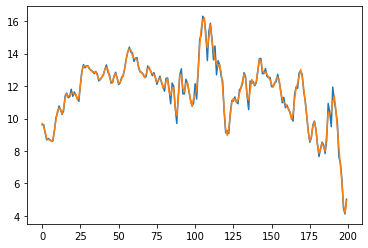

In [8]:
WS_sg = savgol_filter(serScada['wind speed(m/s)'].values, 5, 3) # window size 51, k阶多项式次数 3
a = 100
b = 300
x = serScada['wind speed(m/s)'].values[a:b]
y = WS_sg[a:b]
plt.plot(x)
plt.plot(y)

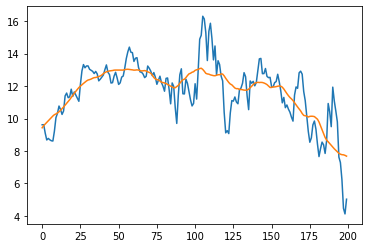

In [10]:
WS_sg = savgol_filter(serScada['wind speed(m/s)'].values, 31, 1) # window size 51, polynomial order 3
a = 100
b = 300
x = serScada['wind speed(m/s)'].values[a:b]
y = WS_sg[a:b]
plt.plot(x)
plt.plot(y)

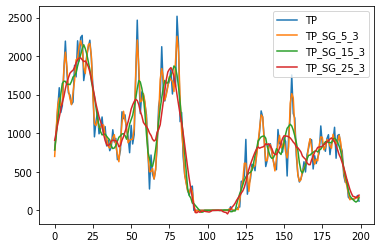

In [29]:
a = 400
b = 600
x = serScada['theoretical power(kW)'].values[a:b]
plt.plot(x, label='TP')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 5, 3) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_5_3')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 15, 3) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_15_3')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 25, 3) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_25_3')

plt.legend()
# plt.savefig('temp/filter_SG_show_compare.png', dpi=600)
plt.show()


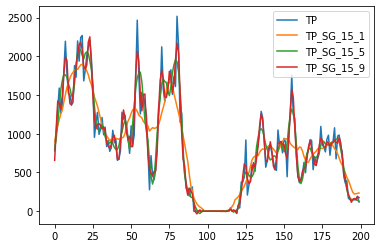

In [93]:
a = 400
b = a+200
x = serScada['theoretical power(kW)'].values[a:b]
plt.plot(x, label='TP')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 15, 1) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_15_1')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 15, 5) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_15_5')

TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, 15, 9) # window size 51, polynomial order 3
y = TP_sg[a:b]
plt.plot(y, label='TP_SG_15_9')

plt.legend()
# plt.savefig('temp/filter_SG_show_compare.png', dpi=600)
plt.show()


## sg_w=15

In [2]:
a = 400
b = a+150
y1 = serScada['theoretical power(kW)'].values[a:b]
y2 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 1)[a:b]
y3 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 5)[a:b]
y4 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 9)[a:b]
x = np.array(range(len(y1)))+1

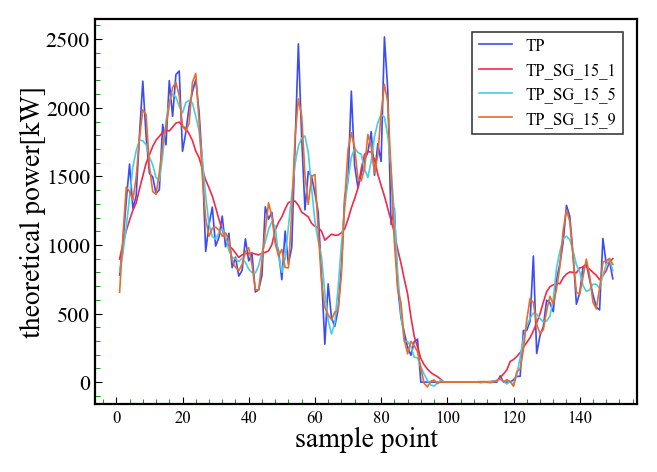

In [3]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#F2294B', '#44CEEB', '#E86D27']

ax.plot(x, y1,
        label='TP',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='TP_SG_15_1',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='TP_SG_15_5',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='TP_SG_15_9',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('sample point', fontsize=10, labelpad=0)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'theoretical power[kW]', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.68, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=6) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽

# plt.grid(ls='--', linewidth=0.4)  # 网格

# plt.savefig('temp/compare_result_filter_tp_sg_15_1-9.png', dpi=600)
plt.show()
plt.close(fig)

CN

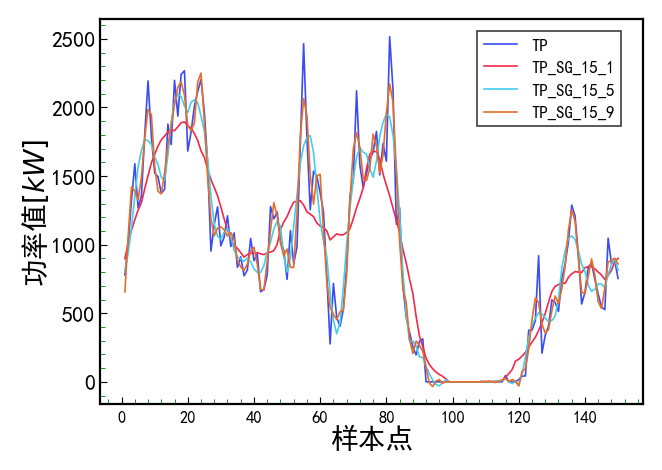

In [5]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#F2294B', '#44CEEB', '#E86D27']

ax.plot(x, y1,
        label='TP',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='TP_SG_15_1',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='TP_SG_15_5',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='TP_SG_15_9',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('样本点', fontsize=10, labelpad=0)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'功率值$[kW]$', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.68, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=6) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽

# plt.grid(ls='--', linewidth=0.4)  # 网格

plt.savefig('temp/compare_result_filter_tp_sg_15_1-9_CN.png', dpi=600)
plt.show()
plt.close(fig)

## sg_k=3

In [6]:
a = 400
b = a+150
y1 = serScada['theoretical power(kW)'].values[a:b]
y2 = savgol_filter(serScada['theoretical power(kW)'].values, 5, 3)[a:b]
y3 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 3)[a:b]
y4 = savgol_filter(serScada['theoretical power(kW)'].values, 25, 3)[a:b]
x = np.array(range(len(y1)))+1

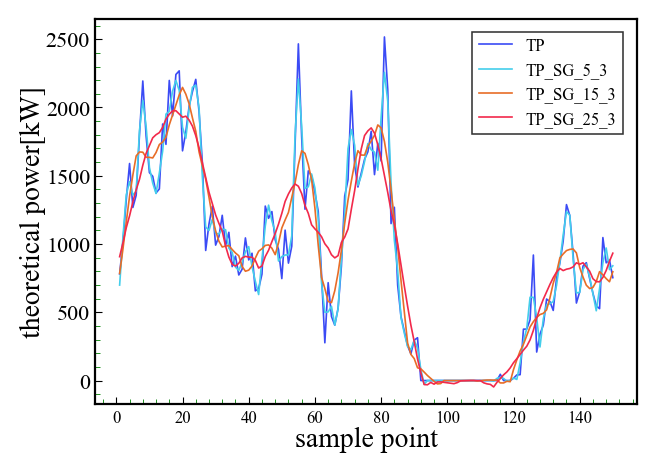

In [127]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#44CEEB', '#E86D27', '#F2294B']

ax.plot(x, y1,
        label='TP',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='TP_SG_5_3',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='TP_SG_15_3',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='TP_SG_25_3',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('sample point', fontsize=10, labelpad=0)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'theoretical power[kW]', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.68, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=6) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽

# plt.grid(ls='--', linewidth=0.4)  # 网格

plt.savefig('temp/compare_result_filter_tp_sg_k3.png', dpi=600)
plt.show()
plt.close(fig)

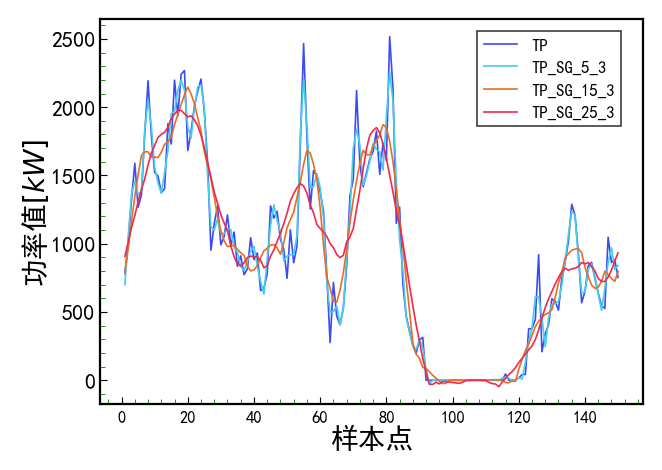

In [7]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#44CEEB', '#E86D27', '#F2294B']

ax.plot(x, y1,
        label='TP',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='TP_SG_5_3',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='TP_SG_15_3',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='TP_SG_25_3',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('样本点', fontsize=10, labelpad=0)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'功率值$[kW]$', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.68, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=6) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽

# plt.grid(ls='--', linewidth=0.4)  # 网格

plt.savefig('temp/compare_result_filter_tp_sg_k3_CN.png', dpi=600)
plt.show()
plt.close(fig)

## 使用SG方法平滑及不同参数下拟合结果对比-WS

In [6]:
serScada

,num,wind speed(m/s),wind direction,theoretical power(kW),active power(kW)
2018-01-01 00:00:00,1,5.311336,259.994904,416.328908,380.047791
2018-01-01 00:10:00,2,5.672167,268.641113,519.917511,453.769196
2018-01-01 00:20:00,3,5.216037,272.564789,390.900016,306.376587
2018-01-01 00:30:00,4,5.659674,271.258087,516.127569,419.645905
2018-01-01 00:40:00,5,5.577941,265.674286,491.702972,380.650696
...,...,...,...,...,...
2018-12-31 23:10:00,52556,11.404030,80.502724,3397.190793,2963.980957
2018-12-31 23:20:00,52557,7.332648,84.062599,1173.055771,1684.353027
2018-12-31 23:30:00,52558,8.435358,84.742500,1788.284755,2201.106934
2018-12-31 23:40:00,52559,9.421366,84.297913,2418.382503,2515.694092


In [2]:
x = (np.array(range(15))+1)*2+1 # 窗口宽度
y = np.array(range(x[-1]))+1 # k
x,y = np.meshgrid(x, y)
z = np.zeros(x.shape)
for i in range(x.shape[1]):
    for j in range(x.shape[0]):
        if y[j,0]<x[0,i]:
            WS_sg = savgol_filter(serScada['wind speed(m/s)'].values, x[0,i], y[j,0])
            z[j,i] = rmse(serScada['wind speed(m/s)'].values, WS_sg)
z

C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  po

C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  po

array([[3.55273574e-01, 4.84341978e-01, 5.70358559e-01, 6.37457099e-01,
        6.92885780e-01, 7.40999115e-01, 7.84579127e-01, 8.24753487e-01,
        8.61969066e-01, 8.96437830e-01, 9.28797823e-01, 9.59374207e-01,
        9.88095570e-01, 1.01522444e+00, 1.04099282e+00],
       [3.72742864e-15, 2.84939767e-01, 3.80189947e-01, 4.45305059e-01,
        4.97835601e-01, 5.41629713e-01, 5.78637258e-01, 6.11092897e-01,
        6.40718698e-01, 6.68583305e-01, 6.94247578e-01, 7.18138429e-01,
        7.41179534e-01, 7.63349042e-01, 7.84689153e-01],
       [0.00000000e+00, 2.84910396e-01, 3.80213358e-01, 4.45196860e-01,
        4.97676548e-01, 5.41550194e-01, 5.78599176e-01, 6.11105811e-01,
        6.40719937e-01, 6.68562952e-01, 6.94200655e-01, 7.18047997e-01,
        7.41089410e-01, 7.63281625e-01, 7.84633170e-01],
       [0.00000000e+00, 2.93357772e-15, 2.53118229e-01, 3.33052281e-01,
        3.87767135e-01, 4.31863279e-01, 4.70326021e-01, 5.03392492e-01,
        5.32113527e-01, 5.57400406e-0

In [3]:
for i in range(z.shape[1]): # wide
    for j in range(z.shape[0]): # k
        if y[j,0]>x[0,i]:
            z[j,i]=np.nan
z

array([[3.55273574e-01, 4.84341978e-01, 5.70358559e-01, 6.37457099e-01,
        6.92885780e-01, 7.40999115e-01, 7.84579127e-01, 8.24753487e-01,
        8.61969066e-01, 8.96437830e-01, 9.28797823e-01, 9.59374207e-01,
        9.88095570e-01, 1.01522444e+00, 1.04099282e+00],
       [3.72742864e-15, 2.84939767e-01, 3.80189947e-01, 4.45305059e-01,
        4.97835601e-01, 5.41629713e-01, 5.78637258e-01, 6.11092897e-01,
        6.40718698e-01, 6.68583305e-01, 6.94247578e-01, 7.18138429e-01,
        7.41179534e-01, 7.63349042e-01, 7.84689153e-01],
       [0.00000000e+00, 2.84910396e-01, 3.80213358e-01, 4.45196860e-01,
        4.97676548e-01, 5.41550194e-01, 5.78599176e-01, 6.11105811e-01,
        6.40719937e-01, 6.68562952e-01, 6.94200655e-01, 7.18047997e-01,
        7.41089410e-01, 7.63281625e-01, 7.84633170e-01],
       [           nan, 2.93357772e-15, 2.53118229e-01, 3.33052281e-01,
        3.87767135e-01, 4.31863279e-01, 4.70326021e-01, 5.03392492e-01,
        5.32113527e-01, 5.57400406e-0

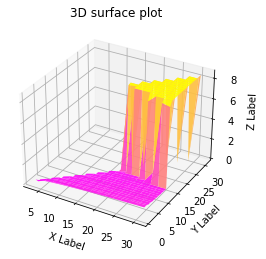

In [152]:
#单独窗口输出图像
# %matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x,y,z,alpha=0.9,cmap="spring")
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.set_title("3D surface plot")
plt.show()

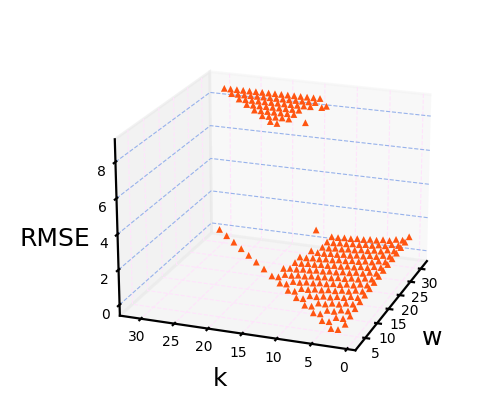

In [6]:
#单独窗口输出图像
# %matplotlib tk
# fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=200)
fig = plt.figure(figsize=(3.5, 2.5), dpi=200)
ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z, alpha=1, marker="^", linewidths=0, c="#ff5511", s=6)

ax.set_xlabel("w", fontsize=9, labelpad=-9)
ax.tick_params(axis='x', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)
ax.set_ylabel("k", fontsize=9, labelpad=-9)
ax.tick_params(axis='y', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)
ax.set_zlabel("RMSE", fontsize=9, labelpad=-8)
ax.tick_params(axis='z', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)

ax.xaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#FFE4FC", "linestyle": "--"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#FFE4FC", "linestyle": "--"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#97B2EB", "linestyle": "--"})

# ax.set_title("3D surface plot")
# 视角转动
# ax.view_init(20,200) #y,z
ax.elev = 20
ax.azim = 200

# plt.savefig('temp/filter_SG.png', dpi=600)
plt.show()
plt.close(fig)

## 使用SG方法平滑及不同参数下拟合结果对比-TP

In [2]:
serScada

,num,wind speed(m/s),wind direction,theoretical power(kW),active power(kW)
2018-01-01 00:00:00,1,5.311336,259.994904,416.328908,380.047791
2018-01-01 00:10:00,2,5.672167,268.641113,519.917511,453.769196
2018-01-01 00:20:00,3,5.216037,272.564789,390.900016,306.376587
2018-01-01 00:30:00,4,5.659674,271.258087,516.127569,419.645905
2018-01-01 00:40:00,5,5.577941,265.674286,491.702972,380.650696
...,...,...,...,...,...
2018-12-31 23:10:00,52556,11.404030,80.502724,3397.190793,2963.980957
2018-12-31 23:20:00,52557,7.332648,84.062599,1173.055771,1684.353027
2018-12-31 23:30:00,52558,8.435358,84.742500,1788.284755,2201.106934
2018-12-31 23:40:00,52559,9.421366,84.297913,2418.382503,2515.694092


In [12]:
x = (np.array(range(15))+1)*2+1 # 窗口宽度
y = np.array(range(x[-1]-1))+1 # k

In [13]:
x

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

In [14]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [16]:
x,y = np.meshgrid(x, y)

In [17]:
x

array([[ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15

In [44]:
z = np.zeros(x.shape)
for i in range(x.shape[1]): # w
    for j in range(x.shape[0]): # k
        if y[j,0]<x[0,i]: # k<w
            WS_sg = savgol_filter(serScada['theoretical power(kW)'].values, x[0,i], y[j,0])
            z[j,i] = rmse(serScada['theoretical power(kW)'].values, WS_sg)
z

C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  po

C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:219: RankWarning: Polyfit may be poorly conditioned
  polyorder, deriv, delta, y)
C:\Users\Administrator\Desktop\env37_1\lib\site-packages\scipy\signal\_savitzky_golay.py:222: RankWarning: Polyfit may be poorly conditioned
  po

array([[1.30343075e+02, 1.74783666e+02, 2.04684425e+02, 2.28194713e+02,
        2.47656036e+02, 2.64456817e+02, 2.79477353e+02, 2.93517806e+02,
        3.06382137e+02, 3.18083039e+02, 3.29133138e+02, 3.39541565e+02,
        3.49338055e+02, 3.58652548e+02, 3.67550368e+02],
       [9.78614828e-13, 1.05540902e+02, 1.38566690e+02, 1.61032098e+02,
        1.79278894e+02, 1.94661484e+02, 2.07859262e+02, 2.18926549e+02,
        2.29326664e+02, 2.39367759e+02, 2.48346333e+02, 2.56742414e+02,
        2.64783162e+02, 2.72384836e+02, 2.79637218e+02],
       [0.00000000e+00, 1.05515448e+02, 1.38582316e+02, 1.60957303e+02,
        1.79184670e+02, 1.94602463e+02, 2.07810847e+02, 2.18924174e+02,
        2.29336591e+02, 2.39367449e+02, 2.48336297e+02, 2.56707577e+02,
        2.64740199e+02, 2.72347622e+02, 2.79600709e+02],
       [0.00000000e+00, 6.19903038e-13, 9.41029399e+01, 1.22100517e+02,
        1.41127740e+02, 1.56192488e+02, 1.69461900e+02, 1.81538967e+02,
        1.91416534e+02, 1.99924919e+0

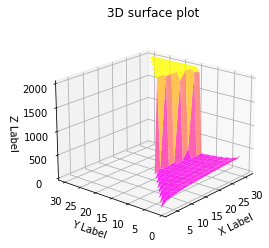

In [26]:
for i in range(z.shape[1]): # wide
    for j in range(z.shape[0]): # k
        if y[j,0]>=x[0,i]:
            z[j,i]=np.nan
            
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x,y,z,alpha=0.9,cmap="spring")
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.set_title("3D surface plot")

ax.view_init(20,220)

plt.show()

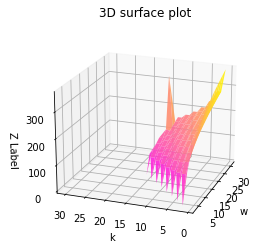

In [45]:
for i in range(z.shape[1]): # wide
    for j in range(z.shape[0]): # k
        if z[j,i]>1500:
            z[j,i]=np.nan
        if y[j,0]>=x[0,i]:
            z[j,i]=np.nan

#单独窗口输出图像
# %matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x,y,z,alpha=0.9,cmap="spring")
ax.set_xlabel("w")
ax.set_ylabel("k")
ax.set_zlabel("Z Label")

ax.set_title("3D surface plot")

ax.view_init(20,200)

plt.show()

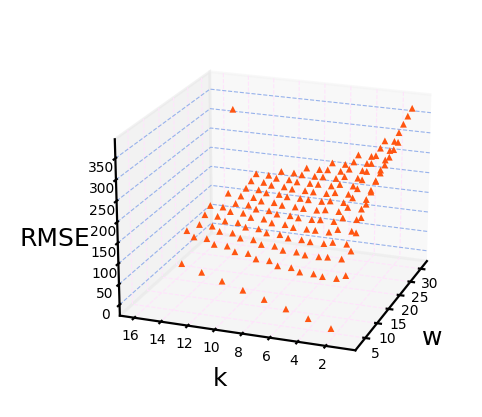

In [32]:
#单独窗口输出图像
# %matplotlib tk
# fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=200)
fig = plt.figure(figsize=(3.5, 2.5), dpi=200)
ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z, alpha=1, marker="^", linewidths=0, c="#ff5511", s=6)

ax.set_xlabel("w", fontsize=9, labelpad=-9)
ax.tick_params(axis='x', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)
ax.set_ylabel("k", fontsize=9, labelpad=-9)
ax.tick_params(axis='y', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)
ax.set_zlabel("RMSE", fontsize=9, labelpad=-8)
ax.tick_params(axis='z', direction='in', pad=-5, labelsize=5, length=2.4, width=0.4)

ax.xaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#FFE4FC", "linestyle": "--"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#FFE4FC", "linestyle": "--"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.4, "color" : "#97B2EB", "linestyle": "--"})

# ax.set_title("3D surface plot")
# 视角转动
# ax.view_init(20,200) #y,z
ax.elev = 20
ax.azim = 200

# plt.savefig('temp/filter_SG.png', dpi=600)
plt.show()
plt.close(fig)

In [54]:
z

array([[1.30343075e+02, 1.74783666e+02, 2.04684425e+02, 2.28194713e+02,
        2.47656036e+02, 2.64456817e+02, 2.79477353e+02, 2.93517806e+02,
        3.06382137e+02, 3.18083039e+02, 3.29133138e+02, 3.39541565e+02,
        3.49338055e+02, 3.58652548e+02, 3.67550368e+02],
       [9.78614828e-13, 1.05540902e+02, 1.38566690e+02, 1.61032098e+02,
        1.79278894e+02, 1.94661484e+02, 2.07859262e+02, 2.18926549e+02,
        2.29326664e+02, 2.39367759e+02, 2.48346333e+02, 2.56742414e+02,
        2.64783162e+02, 2.72384836e+02, 2.79637218e+02],
       [           nan, 1.05515448e+02, 1.38582316e+02, 1.60957303e+02,
        1.79184670e+02, 1.94602463e+02, 2.07810847e+02, 2.18924174e+02,
        2.29336591e+02, 2.39367449e+02, 2.48336297e+02, 2.56707577e+02,
        2.64740199e+02, 2.72347622e+02, 2.79600709e+02],
       [           nan, 6.19903038e-13, 9.41029399e+01, 1.22100517e+02,
        1.41127740e+02, 1.56192488e+02, 1.69461900e+02, 1.81538967e+02,
        1.91416534e+02, 1.99924919e+0

In [41]:
np.savetxt('E:/storage/MLab/hello/data/preprocess_sg_rmse123.csv', z, delimiter = ',')

In [74]:
num = 0
for i in range(z.shape[1]): # wide
    for j in range(z.shape[0]): # k
        if not np.isnan(z[j,i]):
#             print(x[0,i],y[j,0],z[j,i]) # w k z
            num=num+1
print(num)
saveData = np.zeros((num,3))

num = 0
for i in range(z.shape[1]): # wide
    for j in range(z.shape[0]): # k
        if not np.isnan(z[j,i]):
            saveData[num,0] = x[0,i]
            saveData[num,1] = y[j,0]
            saveData[num,2] = z[j,i] # w k z
            num+=1
saveData

172


array([[3.00000000e+00, 1.00000000e+00, 1.30343075e+02],
       [3.00000000e+00, 2.00000000e+00, 9.78614828e-13],
       [5.00000000e+00, 1.00000000e+00, 1.74783666e+02],
       [5.00000000e+00, 2.00000000e+00, 1.05540902e+02],
       [5.00000000e+00, 3.00000000e+00, 1.05515448e+02],
       [5.00000000e+00, 4.00000000e+00, 6.19903038e-13],
       [7.00000000e+00, 1.00000000e+00, 2.04684425e+02],
       [7.00000000e+00, 2.00000000e+00, 1.38566690e+02],
       [7.00000000e+00, 3.00000000e+00, 1.38582316e+02],
       [7.00000000e+00, 4.00000000e+00, 9.41029399e+01],
       [7.00000000e+00, 5.00000000e+00, 9.41185518e+01],
       [7.00000000e+00, 6.00000000e+00, 8.52822051e-12],
       [9.00000000e+00, 1.00000000e+00, 2.28194713e+02],
       [9.00000000e+00, 2.00000000e+00, 1.61032098e+02],
       [9.00000000e+00, 3.00000000e+00, 1.60957303e+02],
       [9.00000000e+00, 4.00000000e+00, 1.22100517e+02],
       [9.00000000e+00, 5.00000000e+00, 1.22035779e+02],
       [9.00000000e+00, 6.00000

In [76]:
np.savetxt('E:/storage/MLab/hello/data/preprocess_sg_rmse_scatterMtlab.csv', saveData, delimiter = ',')

## 均值滤波/卷积曲线

In [3]:
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

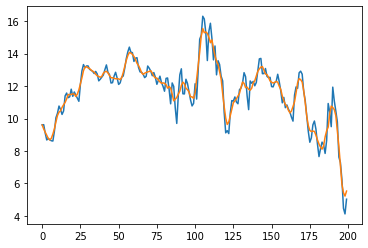

In [96]:
WS_ave = moving_average(serScada['wind speed(m/s)'].values, 5)
a = 100
b = 300
x = serScada['wind speed(m/s)'].values[a:b]
y = WS_ave[a:b]
plt.plot(x)
plt.plot(y)

In [19]:
rmse(serScada['wind speed(m/s)'].values, WS_ave)

0.4849384437316917

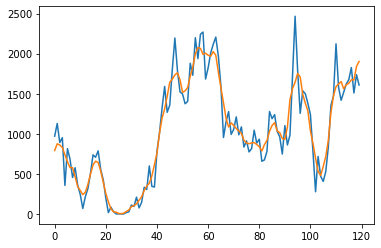

In [110]:
TP_ave = moving_average(serScada['theoretical power(kW)'].values, 5)
a = 360
b = a+120
x = serScada['theoretical power(kW)'].values[a:b]
y = TP_ave[a:b]
plt.plot(x)
plt.plot(y)

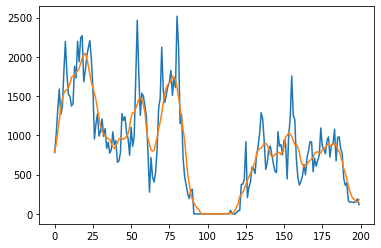

In [101]:
TP_ave = moving_average(serScada['theoretical power(kW)'].values, 10)
a = 400
b = 600
x = serScada['theoretical power(kW)'].values[a:b]
y = TP_ave[a:b]
plt.plot(x)
plt.plot(y)

In [104]:
rmse(serScada['theoretical power(kW)'].values, TP_ave)

174.91102199927192

## 均值滤波误差对比

In [35]:
z = np.loadtxt(open('./predict-wind-turbine/compare_filter/z_rmse.csv', "rb"), delimiter = ",", skiprows = 0)
z[2,1:]

array([118.07156178,  83.45002455,  62.15860973,  53.19657822,
        40.60653625,  37.93748506,  45.05329491,  40.11305788,
        39.05325691,  33.44828915,  36.83082646,  48.11957506,
        28.68872287,  27.23407203])

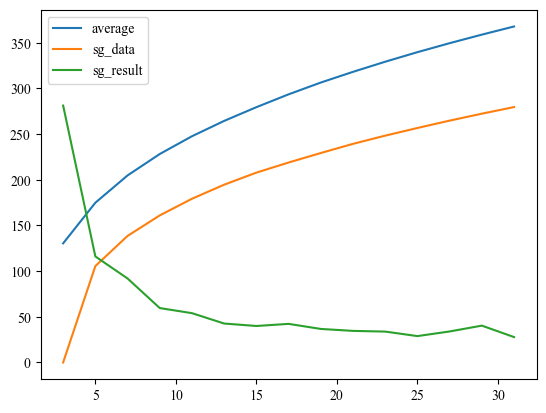

In [38]:
x = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
y1 = np.zeros(15)
y2 = np.zeros(15)
y3 = z[1,0:]
for i in range(len(x)):
    TP_av = moving_average(serScada['theoretical power(kW)'].values, x[i])
    RMSE_av = rmse(serScada['theoretical power(kW)'].values, TP_av)
    TP_sg = savgol_filter(serScada['theoretical power(kW)'].values, x[i], 2)
    RMSE_sg = rmse(serScada['theoretical power(kW)'].values, TP_sg)
    y1[i] = RMSE_av
    y2[i] = RMSE_sg


plt.plot(x,y1,label='average')
plt.plot(x,y2,label='sg_data')
plt.plot(x,y3,label='sg_result')
plt.legend()
plt.show()

### 单纵轴

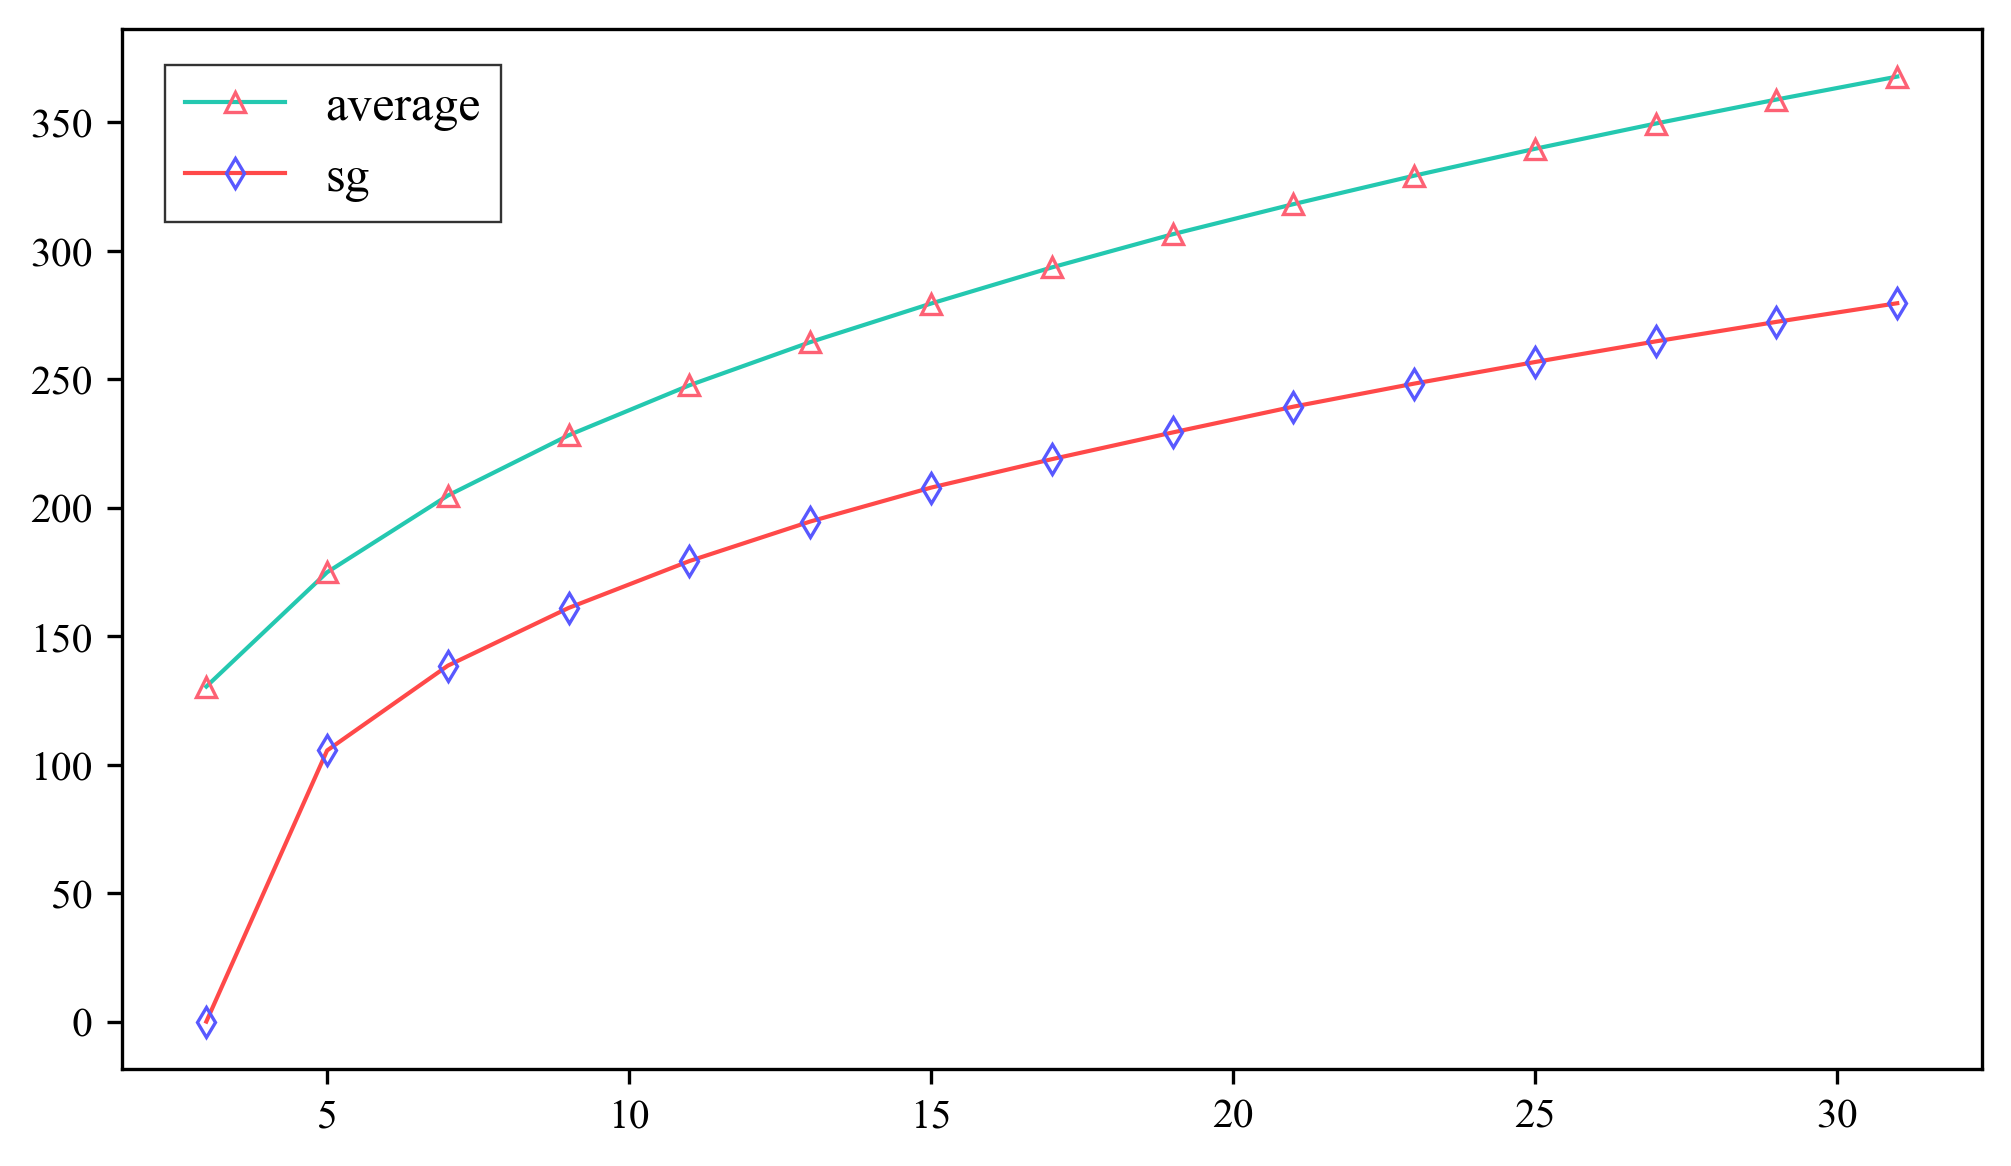

In [43]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig,ax = plt.subplots(figsize=(8,4.5),dpi=300)
ax.plot(x, y1,
        label='average',
        ls='-',
        linewidth=1,
        color='#24C8B0',
        alpha=1,
        marker='^',
        markersize=5,
        markeredgecolor='#FD6174',
        markeredgewidth=0.8,
        markerfacecolor='none')
ax.plot(x, y2,
        label='sg',
        ls='-',
        linewidth=1,
        color='#ff4949',
        alpha=1,
        marker='d',
        markersize=5,
        markeredgecolor='#5858ff',
        markeredgewidth=0.8,
        markerfacecolor='none')
# 显示间隔数量
# x_major_locator = plt.MultipleLocator(3)  # MultipleLocator()函数设置了x轴相邻显示点的间隔
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# 设置时间刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5) 
# 显示图例
# plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.01, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=12)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽
# plt.grid(ls='--', linewidth=0.4)  # 网格
# plt.savefig(saveadress)
plt.show()
plt.close(fig)

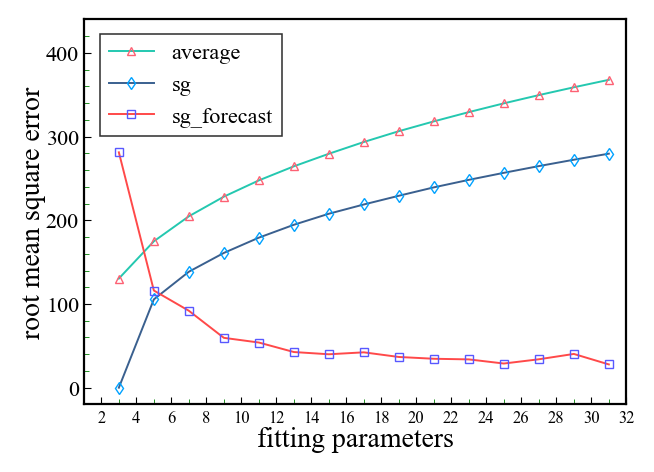

In [88]:
matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)
ax.plot(x, y1,
        label='average',
        ls='-',
        linewidth=0.7,
        color='#24C8B0',
        alpha=1,
        marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='sg',
        ls='-',
        linewidth=0.7,
        color='#3A608F',
        alpha=1,
        marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='sg_forecast',
        ls='-',
        linewidth=0.7,
        color='#ff4949',
        alpha=1,
        marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('fitting parameters', fontsize=10, labelpad=0)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(1)) #将此y轴次刻度标签设置为 的倍数/
plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'root mean square error', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(100)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(20)) #将此y轴次刻度标签设置为 的倍数/
plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.01, 0.99), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽

# plt.grid(ls='--', linewidth=0.4)  # 网格

plt.savefig('temp/compare_result_filter_rmse_2.png', dpi=600)
plt.show()
plt.close(fig)

### 双坐标

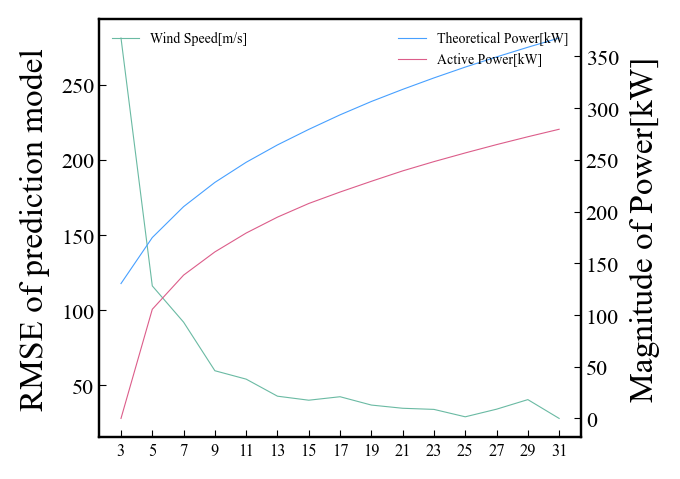

In [42]:

plot1=y3
plot2=y1
plot3=y2

# 将配置重置为默认值
plt.rcdefaults()
config = {
    "font.family":'Times New Roman', # 'serif'
#     "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['stix'], # 'SimSun'
}
matplotlib.rcParams.update(config)
# plt.title(r'宋体 $\mathrm{Times \; New \; Roman}\/\/ \alpha_i > \beta_i$')

# plt.rcParams['text.usetex'] = True  # 全局开启
# plt.rcParams['font.family'] = 'Times New Roman'
#     plt.rcParams('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#     plt.rcParams['font.sans-serif'] = ['mathcal']  # 设置中文编码'Microsoft YaHei''Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示
color = ['#6ABAA3', '#47A0FF', '#DC5D8A']#FD702C#837EFF
# 大小像素
fig, ax1 = plt.subplots(figsize=(3.5, 2.5), dpi=200)

# first part
ax1.plot(x, plot1, label='Wind Speed[m/s]', color=color[0], alpha=1, linewidth=0.4)  # 输入数据绘制第 1 个 y 轴折线图、设置折线颜色
# plt.ylim((80, 620))
# second part
ax2 = ax1.twinx()
ax2.plot(x, plot2, label='Theoretical Power[kW]', color=color[1], alpha=1, linewidth=0.4)  # 输入数据绘制第 2 个 y 轴折线图、设置折线颜色
ax2.plot(x, plot3, label='Active Power[kW]', color=color[2], alpha=1, linewidth=0.4)
# plt.ylim((80, 370))

#设置主刻度标签的位置
# ax1.yaxis.set_major_locator(MultipleLocator(5)) #将y轴主刻度标签设置为 的倍数
# ax2.yaxis.set_major_locator(MultipleLocator(1000))
#设置次刻度标签的位置
# ax1.yaxis.set_minor_locator(MultipleLocator(1)) #将此y轴次刻度标签设置为 的倍数/
# ax2.yaxis.set_minor_locator(MultipleLocator(200))

# 横轴设置
plt.xticks(x)
ax1.tick_params(axis='x', direction='in', pad=2, labelsize=6, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
# ax1.set_xlabel('sample point', fontsize=14)  # 设置 x 轴标签、字体大小
# 显示间隔数量
# x_major_locator = plt.MultipleLocator(1)  # MultipleLocator()函数设置了x轴相邻显示点的间隔
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# 纵轴设置
ax1.set_ylabel(r'RMSE of prediction model', fontsize=12)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax2.set_ylabel('Magnitude of Power[kW]', fontsize=12)  # 设置第 2 个 y 轴特征标签字体颜色、大小
ax1.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax1.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
ax2.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 2 个 y 轴刻度值字体颜色、大小, labelcolor=color
ax2.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3, color="green")
# 图例 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
ax1.legend(loc='upper left', frameon=False, fontsize=5)
ax2.legend(loc='upper right', frameon=False, fontsize=5)

# save and show
fig.tight_layout()
plt.savefig('temp/compare_result_filter_rmse.png', dpi=600)
plt.show()
plt.close(fig)

# Test

## 使用Savitzky-Golay

[62 90 63 44  3 22 27 74 25 36 71 71 99 54 30 91 81 29 36 69 78  1 47 31
 73 42 70 74 45 69 17 78 53 44 76  8 82 19 68 10 24 71 22 42 68 44  1 44
 59 98 84 27 40 24  8  4 80 68 93 77 89 74 62 89 43 30 59  1 18 25  1  3
  7 41 79 89 83 43 57 12 44 36 49 82 13 61 87 46 40 52 77 42 29  4 17 51
 83 89 41 11]


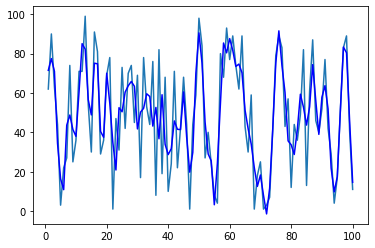

In [11]:
## 用于生成问题描述中示例曲线的代码如下：
# import numpy as np

Size = 100
x = np.linspace(1, Size,Size)

data = np.random.randint(1, Size, Size)
print(data)

      
# 可视化图线
plt.plot(x, data)

# 使用Savitzky-Golay 滤波器后得到平滑图线
from scipy.signal import savgol_filter

y = savgol_filter(data, 5, 3, mode= 'nearest')
# 可视化图线
plt.plot(x, y, 'b', label = 'savgol')


## 3d

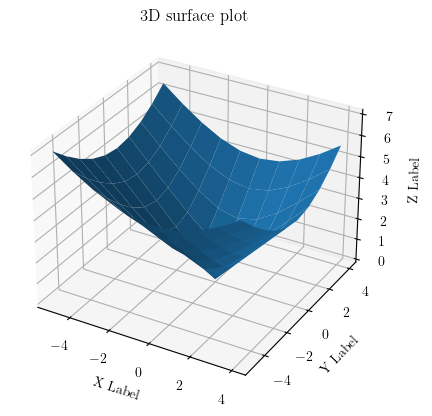

In [22]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

x = np.arange(-5,5,1)
y = np.arange(-5,5,1)
x,y = np.meshgrid(x, y)
z = np.sqrt(x**2 + y**2)

ax.plot_surface(x,y,z)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.set_title("3D surface plot")
plt.show()


In [23]:
x

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])

In [24]:
y

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]])

In [25]:
z

array([[7.07106781, 6.40312424, 5.83095189, 5.38516481, 5.09901951,
        5.        , 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [6.40312424, 5.65685425, 5.        , 4.47213595, 4.12310563,
        4.        , 4.12310563, 4.47213595, 5.        , 5.65685425],
       [5.83095189, 5.        , 4.24264069, 3.60555128, 3.16227766,
        3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [5.38516481, 4.47213595, 3.60555128, 2.82842712, 2.23606798,
        2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [5.09901951, 4.12310563, 3.16227766, 2.23606798, 1.41421356,
        1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [5.        , 4.        , 3.        , 2.        , 1.        ,
        0.        , 1.        , 2.        , 3.        , 4.        ],
       [5.09901951, 4.12310563, 3.16227766, 2.23606798, 1.41421356,
        1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [5.38516481, 4.47213595, 3.6055512

In [13]:
x = (np.array(range(15))+1)*2+1 # 窗口宽度
x

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

In [14]:
x[-1]

31

In [6]:
x

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

In [16]:
y = np.array(range(x[-1]))+1 # k
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [28]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [29]:
x,y = np.meshgrid(x, y)

In [31]:
x

array([[ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
       [ 3,  5,  7,  9, 11, 13, 15

In [30]:
y

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15

In [33]:
x.shape

(30, 15)

In [43]:
filtData = np.zeros(x.shape)
filtData

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [45]:
for i in range(x.shape[1]):
    for j in range(x.shape[0]):
        if y[j,0]<x[0,i]:
            filtData[j,i]=1
filtData

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

In [46]:
x = (np.array(range(15))+1)*2+1 # 窗口宽度
y = np.array(range(w-1))+1 # k
x,y = np.meshgrid(x, y)
z = np.zeros(x.shape)
for i in range(x.shape[1]):
    for j in range(x.shape[0]):
        if y[j,0]<x[0,i]:
            z[j,i] = 1
z

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

## 绘制彩色三维图

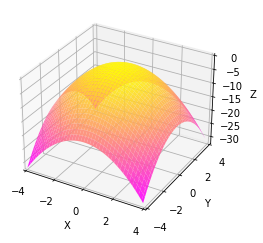

In [12]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import numpy

plt.figure()   
ax = plt.axes(projection="3d")
ax.patch.set_facecolor("white")   #设置 axes 背景颜色
x = numpy.arange(-4,4,0.1)    #0.1为曲面网格x轴长度
y = numpy.arange(-4,4,0.1)    #0.1为曲面网格y轴长度
X,Y = numpy.meshgrid(x,y)    # 生成网格
Z=-X**2-Y**2
ax.plot_surface(X,Y,Z,alpha=0.9,cmap="spring") #生成曲面z，alpha调节透明度，cmap调节曲面色调
#设置X、Y、Z 坐标标签及范围
ax.set_xlabel("X")  
ax.set_xlim(-4,4)  
ax.set_ylabel("Y")
ax.set_ylim(-4,4)
ax.set_zlabel("Z")
plt.show()


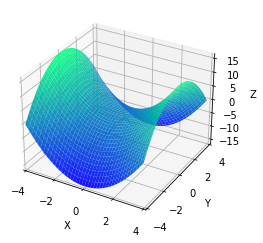

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import numpy

plt.figure()   
ax = plt.axes(projection="3d")
ax.patch.set_facecolor("white")   #设置 axes 背景颜色
x = numpy.arange(-4,4,0.1)    #0.1为曲面网格x轴长度
y = numpy.arange(-4,4,0.1)    #0.1为曲面网格y轴长度
X,Y = numpy.meshgrid(x,y)    # 生成网格
Z=X**2-Y**2
ax.plot_surface(X,Y,Z,alpha=0.9,cmap="winter") #生成曲面z，alpha调节透明度，cmap调节曲面色调
#设置X、Y、Z 坐标标签及范围
ax.set_xlabel("X")  
ax.set_xlim(-4,4)  
ax.set_ylabel("Y")
ax.set_ylim(-4,4)
ax.set_zlabel("Z")
plt.show()


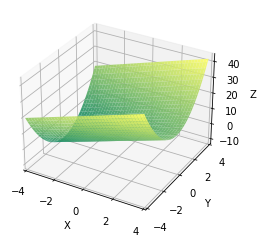

In [16]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import numpy

plt.figure()   
ax = plt.axes(projection="3d")
ax.patch.set_facecolor("white")   #设置 axes 背景颜色
x = numpy.arange(-4,4,0.1)    #0.1为曲面网格x轴长度
y = numpy.arange(-4,4,0.1)    #0.1为曲面网格y轴长度
X,Y = numpy.meshgrid(x,y)    # 生成网格
Z=3*X+2*Y**2
ax.plot_surface(X,Y,Z,alpha=0.9,cmap="summer") #生成曲面z，alpha调节透明度，cmap调节曲面色调
#设置X、Y、Z 坐标标签及范围
ax.set_xlabel("X")  
ax.set_xlim(-4,4)  
ax.set_ylabel("Y")
ax.set_ylim(-4,4)
ax.set_zlabel("Z")
plt.show()


## matplotlib 3d test

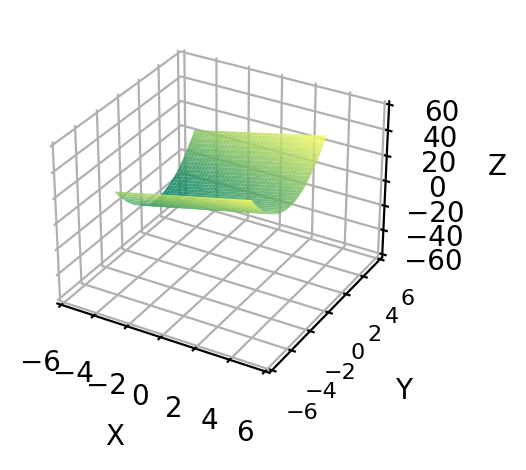

In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import numpy


fig = plt.figure(figsize=(3.5, 2.5), dpi=200)  
ax = plt.axes(projection="3d")

ax.patch.set_facecolor("white")   #设置 axes 背景颜色
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

x = numpy.arange(-4,4,0.1)    #0.1为曲面网格x轴长度
y = numpy.arange(-4,4,0.1)    #0.1为曲面网格y轴长度
X,Y = numpy.meshgrid(x,y)    # 生成网格
Z=3*X+2*Y**2
ax.plot_surface(X,Y,Z,alpha=0.9,cmap="summer") #生成曲面z，alpha调节透明度，cmap调节曲面色调

#设置X、Y、Z 坐标标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 坐标轴刻度范围
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-60,60)

# 设置主刻度标签的位置
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(2)) #将y轴主刻度标签设置为 的倍数
ax.zaxis.set_major_locator(plt.MultipleLocator(20))

ax.tick_params(axis='y', direction='in', pad=1.7, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color

ax.grid(color='b', ls = '-.', lw = 0.25)


plt.savefig('temp/实验图.png',dpi=300)
plt.show()


## matplotlib 3d 柱状图

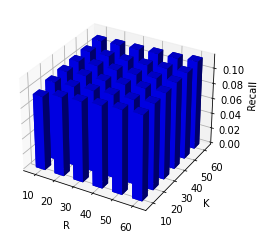

In [14]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import numpy as np

#设置x轴取值
xedges = np.array([10,20,30,40,50,60,70])
#设置y轴取值
yedges = np.array([10,20,30,40,50,60,70])
#设置X,Y对应点的值。即原始数据。
hist =np.array( [[0.0964,0.1024,0.1043,0.1057,0.1072,0.1100],
[0.1027,0.1039,0.1057,0.1069,0.1078,0.1109],
[0.1046,0.1059,0.1061,0.1079,0.1085,0.1114],
[0.1068,0.1079,0.1084,0.1091,0.1096,0.1127],
[0.1091,0.1089,0.1107,0.1112,0.1118,0.1131],
[0.1102,0.1113,0.1121,0.1129,0.1133,0.1157]])

#生成图表对象。
fig = plt.figure()
#生成子图对象，类型为3d
ax = fig.add_subplot(111,projection='3d')

#设置作图点的坐标
xpos, ypos = np.meshgrid(xedges[:-1]-2.5 , yedges[:-1]-2.5 )
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

#设置柱形图大小
dx =5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

#设置坐标轴标签
ax.set_xlabel('R')
ax.set_ylabel('K')
ax.set_zlabel('Recall')

# x, y, z: array - like
# The coordinates of the anchor point of the bars.
# dx, dy, dz: scalar or array - like
# The width, depth, and height of the bars, respectively.
# minx = np.min(x)
# maxx = np.max(x + dx)
# miny = np.min(y)
# maxy = np.max(y + dy)
# minz = np.min(z)
# maxz = np.max(z + dz)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color='b',zsort='average')

plt.show()


## 空数组

In [84]:
a = np.zeros(shape=(6,8))
a

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [85]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if i<j:
            a[i,j]=np.nan
a

array([[ 0., nan, nan, nan, nan, nan, nan, nan],
       [ 0.,  0., nan, nan, nan, nan, nan, nan],
       [ 0.,  0.,  0., nan, nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0., nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0.,  0., nan, nan]])

In [76]:
a[:,2] = np.nan
a

array([[72.,  0., nan],
       [ 0., 72., nan],
       [ 0.,  0., nan]])

In [36]:
a[1,1]

nan

## 点

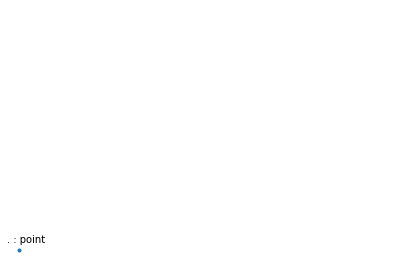

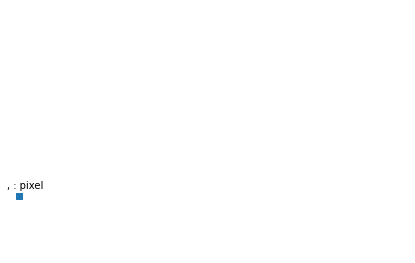

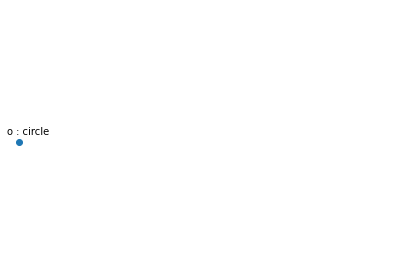

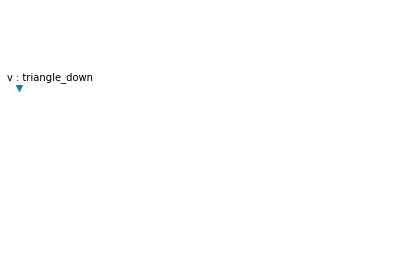

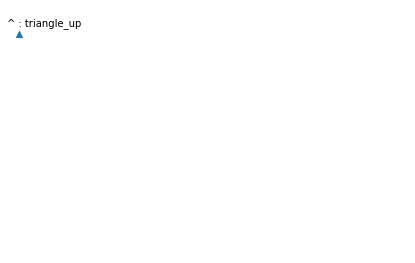

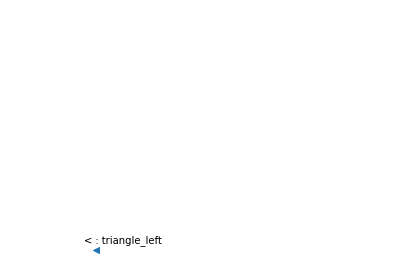

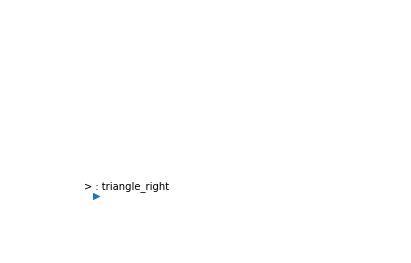

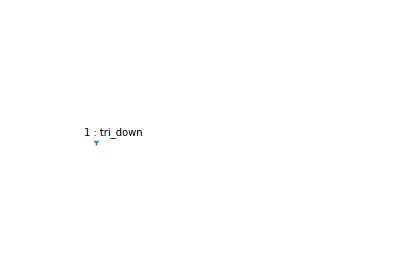

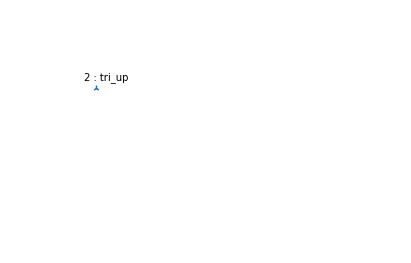

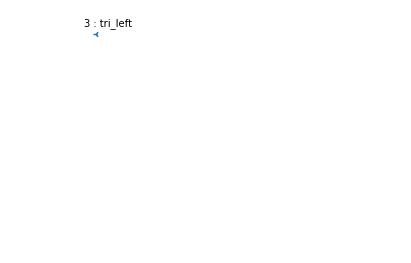

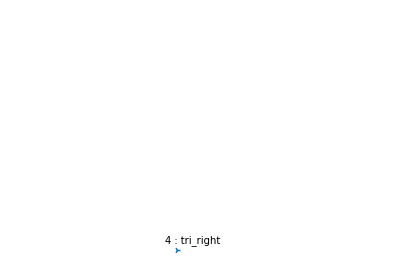

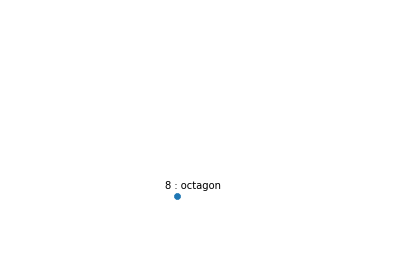

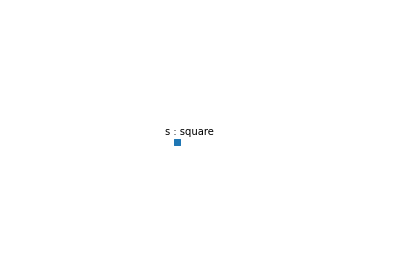

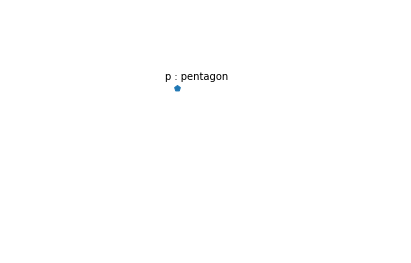

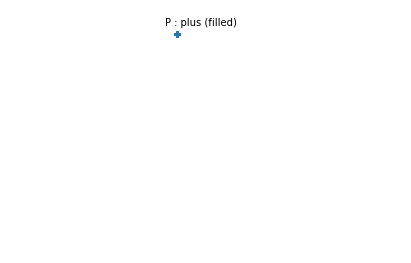

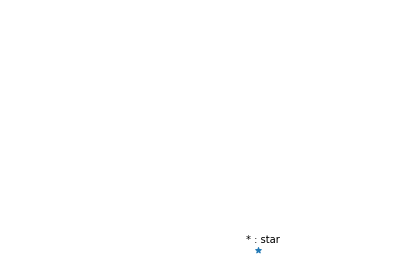

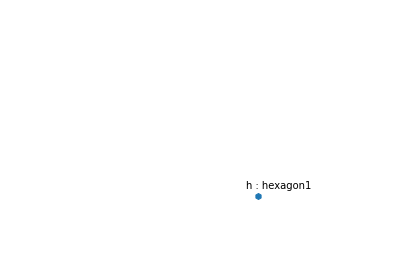

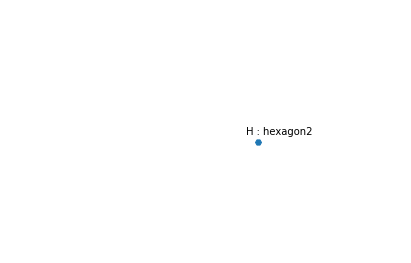

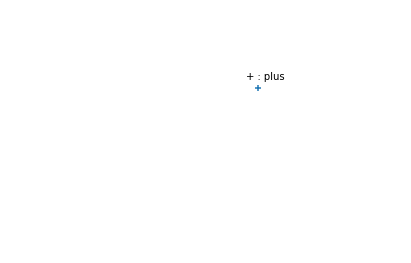

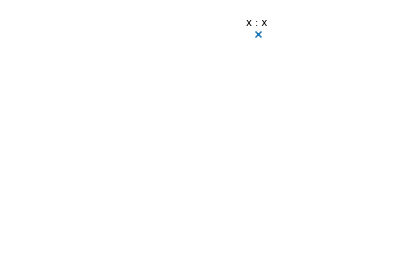

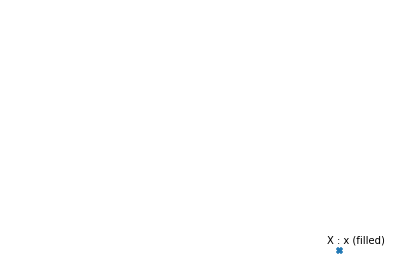

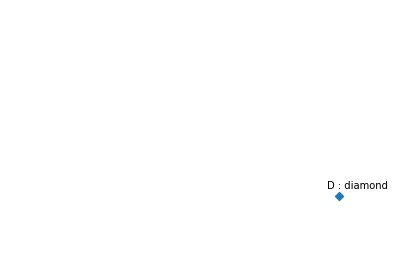

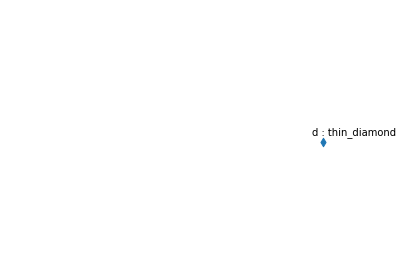

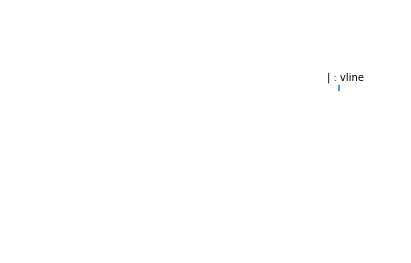

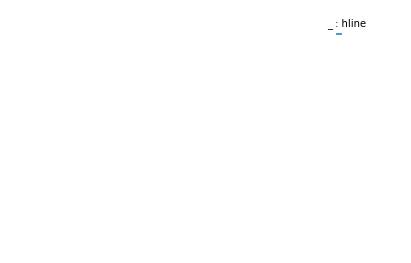

In [139]:
import matplotlib.pylab as plt
markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D',
'd', '|', '_']
descriptions = ['point', 'pixel', 'circle', 'triangle_down', 'triangle_up', 'triangle_left', 'triangle_right',
'tri_down', 'tri_up', 'tri_left', 'tri_right', 'octagon', 'square', 'pentagon', 'plus (filled)', 'star',
'hexagon1', 'hexagon2', 'plus', 'x', 'x (filled)', 'diamond', 'thin_diamond', 'vline', 'hline']
x = []
y = []
for i in range(5):
    for j in range(5):
        x.append(i)
        y.append(j)
        
plt.figure()
for i, j, m, l in zip(x, y, markers, descriptions):
    plt.scatter(i, j, marker=m)
    plt.text(i - 0.15, j + 0.15, s=m + ' : ' + l)
    plt.axis([-0.1, 4.8, -0.1, 4.5])
    plt.tight_layout()
    plt.axis('off')
    plt.show()


C:\Users\Administrator\Desktop\env37_1\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


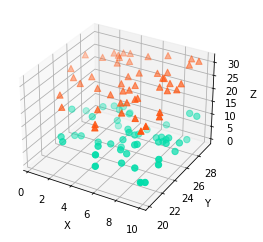

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection="3d")

xs = np.random.rand(50)*10
ys = np.random.rand(50)*10+20
zs1=np.random.rand(50)*10
zs2 = np.sqrt(xs**2+ys**2)

ax.scatter(xs, ys, zs=zs1, zdir="z", c="#00DDAA", marker="o", s=40)
ax.scatter(xs, ys, zs=zs2, zdir="z", c="#FF5511", marker="^", s=40)

ax.set(xlabel="X", ylabel="Y", zlabel="Z")

plt.show()


## 字体

(0.0, 1.0, 0.0, 1.0)

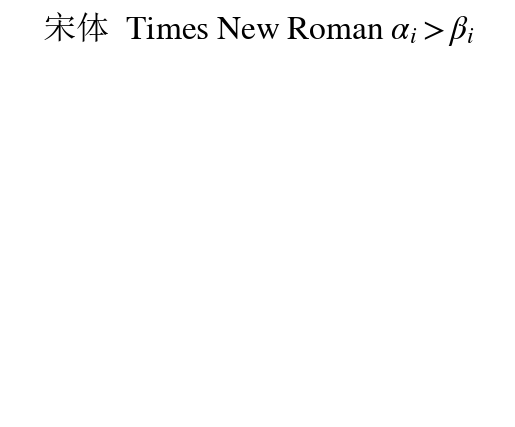

In [15]:
import matplotlib.pyplot as plt

from matplotlib import rcParams

config = {

"font.family":'serif',

"font.size": 20,

"mathtext.fontset":'stix',

"font.serif": ['SimSun'],

}

rcParams.update(config)

plt.title(r'宋体 $\mathrm{Times \; New \; Roman}\/\/ \alpha_i > \beta_i$')

plt.axis('off')

# plt.savefig("usestix.png")

## 图片大小

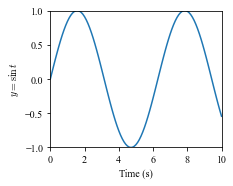

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rc('font',family='Times New Roman')
plt.rcParams['mathtext.fontset']='cm'

t = np.linspace(0,10,101)
y = np.sin(t)

mm = 1/25.4 # inch 和 毫米的转换
fig,ax = plt.subplots(figsize=(80*mm,64*mm)) # 刚才构思的图片长、宽

ax.plot(t,y)
ax.set_xlim([0,10])
ax.set_ylim([-1,1])
ax.set_xlabel('Time (s)',fontsize=10)
ax.set_ylabel('$y=\sin t$',fontsize=10)

ax.set_aspect(1.0/ax.get_data_ratio()*0.8) # 图片的长宽比

# fig.savefig('myfig.svg',bbox_inches='tight',transparent=True)

## 插值

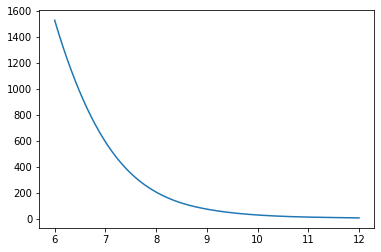

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline

x = np.array([6, 7, 8, 9, 10, 11, 12])
y = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
x_smooth = np.linspace(x.min(), x.max(), 300)  # np.linspace 等差数列,从x.min()到x.max()生成300个数，便于后续插值
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth)
plt.show()


## 滑动平均

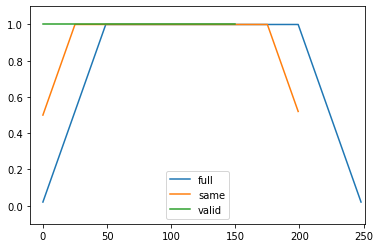

In [17]:
import numpy as np
import matplotlib.pyplot as plt
 
def np_move_avg(a,n,mode="same"):
    return(np.convolve(a, np.ones((n,))/n, mode=mode))
 
modes = ['full', 'same', 'valid']

for m in modes:
    plt.plot(np_move_avg(np.ones((200,)), 50, mode=m))


plt.axis([-10, 251, -.1, 1.1])

plt.legend(modes, loc='lower center')

plt.show()

t= [-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  

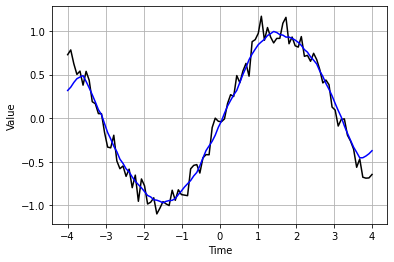

In [16]:
# 实现数据可视化中的数据平滑
import numpy as np
import matplotlib.pylab as plt
 
'''
其它的一些知识点：
raise：当程序发生错误，python将自动引发异常，也可以通过raise显示的引发异常
一旦执行了raise语句，raise语句后面的语句将不能执行
'''
 
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re
 
def LabberRing():
    t = np.linspace(-4, 4, 100)   # np.linspace 等差数列,从-4到4生成100个数
    print('t=', t)
 # np.random.randn 标准正态分布的随机数，np.random.rand 随机样本数值
    y = np.sin(t) + np.random.randn(len(t)) * 0.1   # 标准正态分布中返回1个，或者多个样本值
    print('y=', y)
    
    plt.plot(t, y, 'k')     # plot(横坐标，纵坐标， 颜色)
    
    y_av = moving_average(y, 10)
    plt.plot(t, y_av, 'b')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.grid()网格线设置
    plt.grid(True)
    plt.show()
    return
 
LabberRing()  # 调用函数

## 核平滑

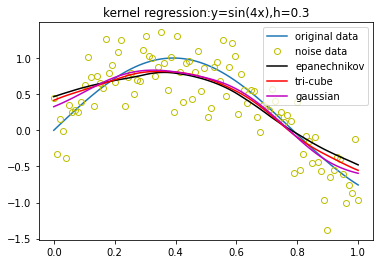

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def kernel_regression(x, h, h0):
    weight_e = lambda t:  (1-t**2)*3/4 
    weight_t = lambda t:  (1-t**3)**3 
    y = np.sin(4*x)
    y_noise = y + np.random.randn(len(x))/3

    num = len(x)
    y_rec_e = np.zeros(num)
    y_rec_t = np.zeros(num)
    y_rec_g = np.zeros(num)
    for i in range(num):
        dist = np.abs(x-x[i])/h  
        # epanechnikov
        w_e = weight_e(dist)*np.where(dist<=1,1,0)              
        y_rec_e[i] = np.sum(y_noise*w_e)/np.sum(w_e)
        # tri-cube
        w_t = weight_t(dist)*np.where(dist<=1,1,0) 
        y_rec_t[i] = np.sum(y_noise*w_t)/np.sum(w_t)
    
    # gaussian kernel    
    gaussian_kernel = lambda d,h: np.exp(-dist**2/(2*(h**2)))/(np.sqrt(2*np.pi)*h)
    for i in range(num):
        dist = np.abs(x-x[i])
        w = gaussian_kernel(dist,h0)
        y_rec_g[i] = np.sum(y_noise*w)/np.sum(w)        
    return y_rec_g, y_rec_e, y_rec_t, y_noise, y

if __name__ == '__main__':    
    plt.figure
    snum = 100
    h = 0.3
    h0 = 0.1
    x = np.linspace(0,1,snum)
    y_rec_g, y_rec_e, y_rec_t, y_noise, y = kernel_regression(x,h,h0)
    plt.plot(x,y)
    plt.plot(x,y_noise,'yo',markerfacecolor='none')
    plt.plot(x,y_rec_e,'k')
    plt.plot(x,y_rec_t,'r')
    plt.plot(x,y_rec_g,'m')    
    plt.legend(labels=['original data','noise data','epanechnikov','tri-cube','gaussian'],loc='upper right')
    plt.title('kernel regression:y=sin(4x),h=0.3') 
    plt.show()


## 卡尔曼

原示例

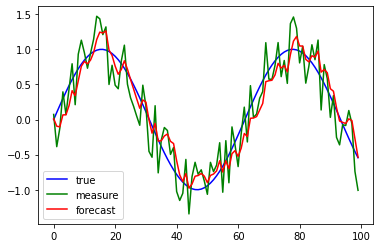

In [145]:
import numpy as np
import matplotlib.pyplot as plt

"""
Q 系统噪声
R 测量噪声
X(k|k-1)   上一次状态预测结果
X(k-1|k-1) 上一时刻的最优预测值
P(k|k-1)   X(k|k-1)对应的convariance协方差
P(k-1|k-1) X(k-1|k-1) 对应的convariance协方差
"""

x_last = 0
p_last = 0
Q = 0.1  #系统噪声
R = 0.5  #测量噪声

def kalman(z_measure,x_last=0,p_last=0,Q=0.018,R=0.0542):
    x_mid = x_last
    p_mid = p_last + Q
    kg = p_mid/(p_mid + R)
    x_now = x_mid + kg*(z_measure - x_mid)
    p_now = (1-kg)*p_mid
    p_last = p_now
    x_last = x_now
    return x_now,p_last,x_last
    
real = np.sin(np.linspace(0,10,100))
chao = np.random.rand(100)-0.5
x = real+chao
y = []
for i in range(len(x)):
    pred,p_last,x_last = kalman(x[i],x_last,p_last,Q,R)
    y.append(pred)
    
plt.plot(real,color="b", label='true')  #真实值
plt.plot(x,color="g", label='measure')     #测量值
plt.plot(y,color="r", label='forecast')     #预测值
plt.legend()
plt.show()



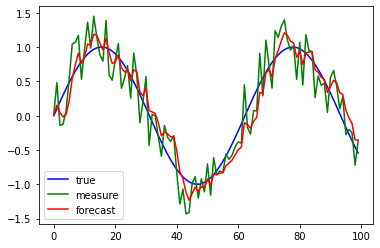

In [176]:
"""
Q 系统噪声
R 测量噪声
X(k|k-1)   上一次状态预测结果
X(k-1|k-1) 上一时刻的最优预测值
P(k|k-1)   X(k|k-1)对应的convariance协方差
P(k-1|k-1) X(k-1|k-1) 对应的convariance协方差
"""

x_last = 0
p_last = 0
Q = 0.1  #系统噪声
R = 0.4  #测量噪声

def kalman(z_measure,x_last=0,p_last=0,Q=0.018,R=0.0542):
    x_mid = x_last
    p_mid = p_last + Q
    kg = p_mid/(p_mid + R)
    x_now = x_mid + kg*(z_measure - x_mid)
    p_now = (1-kg)*p_mid
    p_last = p_now
    x_last = x_now
    return x_now,p_last,x_last
    
real = np.sin(np.linspace(0,10,100))
chao = np.random.rand(100)-0.5
x = real+chao
y = []
for i in range(len(x)):
    pred,p_last,x_last = kalman(x[i],x_last,p_last,Q,R)
    y.append(pred)
    
plt.plot(real,color="b", label='true')  #真实值
plt.plot(x,color="g", label='measure')     #测量值
plt.plot(y,color="r", label='forecast')     #预测值
plt.legend()
plt.show()

## 图片设置_画框粗细

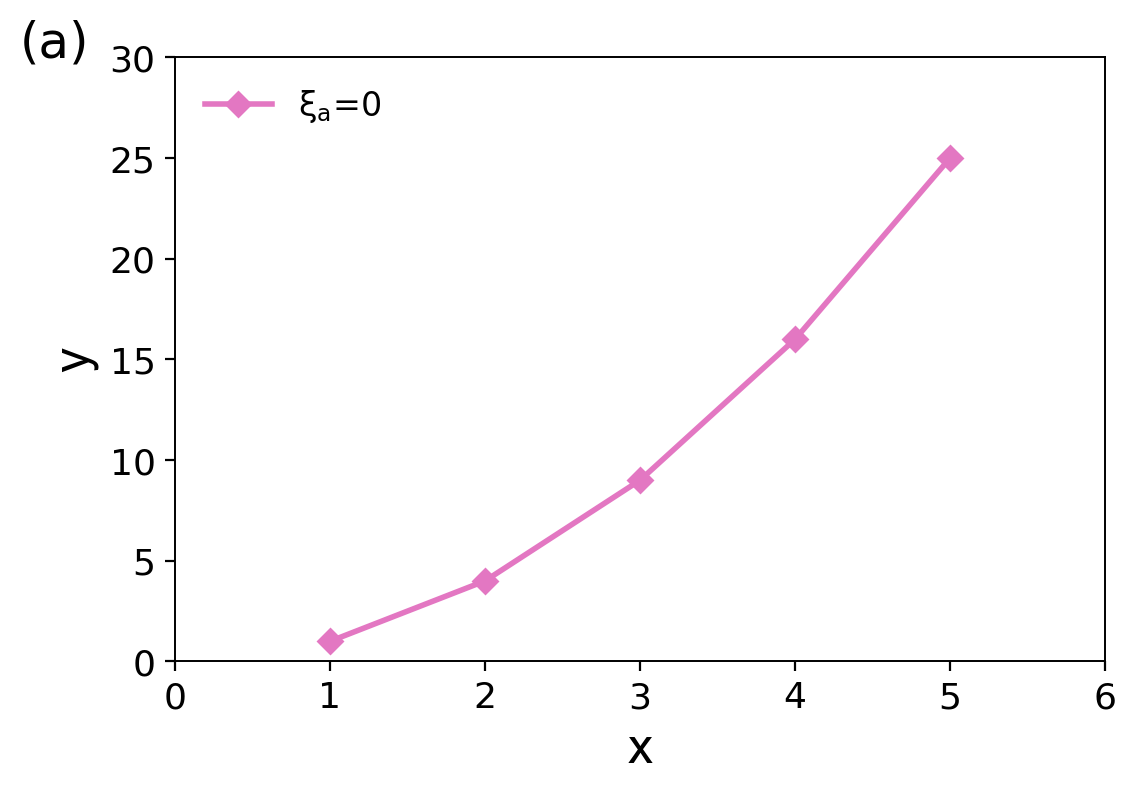

In [4]:
import matplotlib #引入画图数据库
import matplotlib.pyplot as plt

# Data for plotting
x=[1,2,3,4,5]
y=[1,4,9,16,25]
plt.plot(x,y,linewidth =2.0, label = r"$\mathregular{\xi_a}$=0",color='tab:pink', linestyle='solid',marker='D') #画图，自变量x放前面
#以下为图形设置参数
plt.legend(frameon=False,loc="upper left",fontsize='large') #设置图例无边框，将图例放在左上角
plt.rcParams['figure.figsize']=(6.0,4.0) #图形大小
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辨率情况下改变比例

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,
}
plt.xlabel('x',font1) #x轴坐标名称及字体样式
plt.ylabel('y',font1) #y轴坐标名称及字体样式
#插入文本框
plt.text(-1, 30,'(a)',fontsize=18) #在图中添加文本

plt.xticks(fontsize=13) #x轴刻度字体大小
plt.yticks(fontsize=13) #y轴刻度字体大小
plt.xlim(0,6)#X轴范围
plt.ylim(0,30)#显示y轴范围

#设置图框线粗细
bwith = 0.7 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)

#plt.grid() #显示网格线
plt.show()